In [ ]:
# グラフで日本語を使うため

!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 5.3 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=b9a7880dc619d93ac967bf59d95c39ba070a465af4d38cd44a93c6c86f754afb
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize-matplotlib


In [ ]:
# Mecabインストール

! pip install mecab-python3
! pip install unidic-lite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 577 kB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47.4 MB 92 kB/s 
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658837 sha256=85554a54b337a73af0e634a3ea68344827a9c9908df2a23187a4a593cc748890
  Stored in directory: /root/.cache/pip/wheels/8c/dd/8f/e21fc192dcd38ae31e1185ce4e66e12df4e811e3d469866e15
Successfully built unidic-lite


In [ ]:
# 形態素解析

import MeCab

fout = open('neko.txt.mecab', 'w')
fin = open('neko.txt', 'r')
tokenizer = MeCab.Tagger()
for line in fin:
    fout.write("".join([token for token in tokenizer.parse(line.strip())]) + "\n")
fin.close()
fout.close()

In [ ]:
#30. 形態素解析結果の読み込み

fin = open('neko.txt.mecab', 'r')
text = fin.readlines()
seg_list = []
for line in text:
  if line == 'EOS\n'or line == '\n':
    continue
  seg_word = line.split('\t')
  pos = seg_word[4].split('-')
  if len(pos)>1:
    pos1 = pos[1]
  else:
    pos1 = ''
  seg_list.append({'surface':seg_word[0], 'base':seg_word[3], 'pos':pos[0], 'pos1':pos1})

seg_list[:30]

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数詞'},
 {'surface': '吾輩', 'base': '我が輩', 'pos': '代名詞', 'pos1': ''},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '普通名詞'},
 {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': ''},
 {'surface': 'ある', 'base': '有る', 'pos': '動詞', 'pos1': '非自立可能'},
 {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'},
 {'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '普通名詞'},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': 'まだ', 'base': '未だ', 'pos': '副詞', 'pos1': ''},
 {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '非自立可能'},
 {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'},
 {'surface': 'どこ', 'base': '何処', 'pos': '代名詞', 'pos1': ''},
 {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'},
 {'surface': '生れ', 'base': '生まれる', 'pos': '動詞', 'pos1': '一般'},
 {'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': ''},
 {'surface': 'か', 'base': '

In [ ]:
#31. 動詞

ans = set()
for word in seg_list:
  if word['pos'] == '動詞':
    ans.add(word['surface'])
 
print(list(ans)[:10])

['休む', '限ら', '呼びつけ', '翳す', '近付く', '引き受ける', '生れる', '息ん', 'ひっくり返る', 'ごまかす']


In [ ]:
#32. 動詞の基本形

ans = set()
for word in seg_list:
  if word['pos'] == '動詞':
    ans.add(word['base'])
 
print(list(ans)[:10])

['休む', '迫り出す', '扱く', '翳す', '近付く', '引き受ける', 'ごまかす', '踏み潰す', '染み出す', '戯らす']


In [ ]:
#33. 「AのB」

ans = set()
for idx in range(1, len(seg_list)-1):
  if seg_list[idx-1]['pos'] == '名詞' and seg_list[idx]['surface'] == 'の' and seg_list[idx+1]['pos'] == '名詞':
    ans.add(seg_list[idx-1]['surface'] + seg_list[idx]['surface'] + seg_list[idx+1]['surface'])

print(list(ans)[:10])

['年の歳月', '三の条件', '他の局部', '尻のところ', '半の甲', '会社の人', '画の未練', '隣りの三毛', '人の中', '書生の掌']


In [ ]:
#34. 名詞の連接

ans = set()
count = 0
nouns = ''
for word in seg_list:
  if word['pos'] == '名詞':
    nouns += word['surface']
    # pythonでは++は使えないらしい
    count += 1
  elif count >= 2:
    ans.add(nouns)
    count = 0
    nouns = ''
  else:
    count = 0
    nouns = ''

print(list(ans)[:10])  

['江戸趣味', '三坪', '四海天下', '三方面', 'すべて人間', '日藤', '迷惑千万', '盗難告訴', '通り手のひら', '朝鮮仁参']


In [ ]:
#35. 単語の出現頻度

from collections import Counter

#表層系を抽出
words = []
for word in seg_list:
    words.append(word['surface'])

#上位10単語を出力
word_cnt = Counter(words)
word_cnt_sort = word_cnt.most_common()
for i in range(10):
  print(word_cnt_sort[i])

('の', 9541)
('。', 7486)
('て', 7418)
('に', 7060)
('、', 6773)
('は', 6501)
('と', 6156)
('を', 6119)
('が', 5394)
('で', 4543)


<BarContainer object of 10 artists>

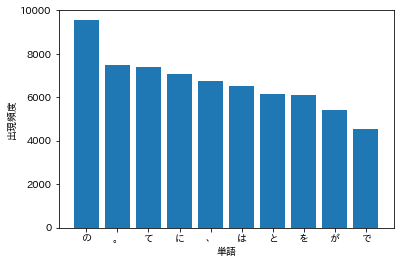

In [ ]:
#36. 頻度上位10語

from collections import Counter
import matplotlib.pyplot as plt

#表層系を抽出
words = []
for word in seg_list:
    words.append(word['surface'])

#単語の集計＋並び替え
word_cnt = Counter(words)
word_cnt_sort = word_cnt.most_common()

#上位10単語をプロット
x = []
height = []
for i in word_cnt_sort[:10]:
  x.append(i[0])
  height.append(i[1])

plt.xlabel('単語')
plt.ylabel('出現頻度')
plt.bar(x, height)

<BarContainer object of 10 artists>

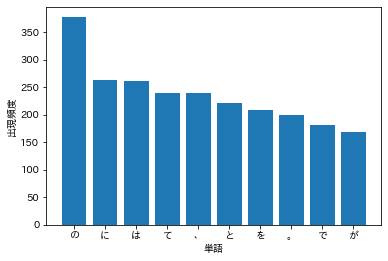

In [ ]:
#37. 「猫」と共起頻度の高い上位10語

from collections import Counter

#単語分割した文章を作っている。
sentences = []
tmp = []
for line in text:
  if line == '\n':
    continue
  if line == 'EOS\n':
    sentences.append(tmp)
    tmp = []
    continue
  seg_word = line.split('\t')
  tmp.append(seg_word[0])

#文に猫があるとき、その他の単語を加える。
cooccurrence = []
for sentence in sentences:
  if '猫' in sentence:
    for word in sentence:
      cooccurrence.append(word)

#単語の集計＋並び替え（猫は削除）
cooccurrence_cnt = Counter(cooccurrence)
del cooccurrence_cnt['猫']
cooccurrence_cnt_sort = cooccurrence_cnt.most_common()

#上位10単語をプロット
x = []
height = []
for i in cooccurrence_cnt_sort[:10]:
  x.append(i[0])
  height.append(i[1])

plt.xlabel('単語')
plt.ylabel('出現頻度')
plt.bar(x, height)

(array([1.3727e+04, 1.0000e+01, 5.0000e+00, 3.0000e+00, 2.0000e+00,
        1.0000e+00, 3.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.000e+00, 9.550e+02, 1.909e+03, 2.863e+03, 3.817e+03, 4.771e+03,
        5.725e+03, 6.679e+03, 7.633e+03, 8.587e+03, 9.541e+03]),
 <a list of 10 Patch objects>)

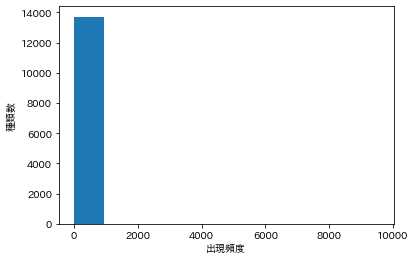

In [ ]:
#38. ヒストグラム

from collections import Counter
import matplotlib.pyplot as plt

#表層系を抽出
words = []
for word in seg_list:
    words.append(word['surface'])

#単語の集計
word_cnt = Counter(words)

plt.xlabel('出現頻度')
plt.ylabel('種類数')
plt.hist(word_cnt.values())

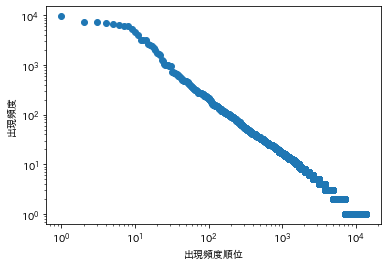

In [ ]:
#39. Zipfの法則

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

#表層系を抽出
words = []
for word in seg_list:
    words.append(word['surface'])

#単語の集計＋並び替え
word_cnt = Counter(words)
word_cnt_sort = word_cnt.most_common()

values = [word[1] for word in word_cnt_sort]
plt.scatter(range(1, len(values)+1), values)
#ログスケールにする
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()